In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/sushil/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [10]:
import joblib

In [9]:
from sklearn.metrics import classification_report

In [16]:
X=joblib.load("bag_of_words")
y=joblib.load("y_amazon_10000")

In [17]:
print(y.shape)
X

(9990,)


<9990x2850 sparse matrix of type '<class 'numpy.int64'>'
	with 310938 stored elements in Compressed Sparse Row format>

In [18]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=False)

In [19]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(7992, 2850)
(1998, 2850)
(7992,)
(1998,)


In [20]:
x_train,x_cv,y_train,y_cv=train_test_split(X_train,Y_train,test_size=0.20,shuffle=False)
print(x_train.shape)
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(6393, 2850)
(1599, 2850)
(6393,)
(1599,)


In [21]:
from sklearn.model_selection import cross_val_score 

In [24]:
from sklearn.model_selection import cross_val_predict


The optimal number of neighbors is 9.


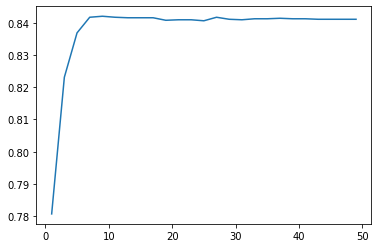

In [51]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores=[]
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    scores=cross_val_score(clf,x_train,y_train,cv=10,scoring="accuracy")
    cv_scores.append(scores.mean())
MSE=[1-x for x in cv_scores]    
optimal_k=neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(neighbors,cv_scores)
plt.show()
    

In [52]:
from sklearn import datasets,metrics
from sklearn.metrics import accuracy_score

the accuracy of train model 0.8167604752970606
[[  17  282]
 [  11 1289]]
              precision    recall  f1-score   support

           0       0.61      0.06      0.10       299
           1       0.82      0.99      0.90      1300

    accuracy                           0.82      1599
   macro avg       0.71      0.52      0.50      1599
weighted avg       0.78      0.82      0.75      1599



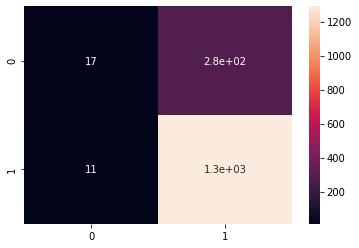

In [55]:
knn=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="brute")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_cv)
y_proba=knn.predict_proba(x_cv)
accuracy=accuracy_score(y_cv,y_pred)
confusion_mat=confusion_matrix(y_cv,y_pred,labels=[0,1])
classification_reports=classification_report(y_cv,y_pred,labels=[0,1])
print("the accuracy of train model",accuracy)
print(confusion_mat)
print(classification_reports)
sns.heatmap(confusion_mat,annot=True,)
plt.show()

In [54]:
a=[1,2,0,3,4,5,6]
b=[9,8,7,6,3,2,0]
print(min(a))
print(a.index(min(a)))
print(b[a.index(min(a))])

0
2
7


In [56]:
tfidf=joblib.load("tfidf")

In [57]:
tfidf

<9990x6526 sparse matrix of type '<class 'numpy.float64'>'
	with 397682 stored elements in Compressed Sparse Row format>

In [71]:
X_train,x_test,Y_train,y_test=train_test_split(tfidf,y,test_size=0.3,shuffle=False)
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(6993, 6526)
(2997, 6526)
(6993,)
(2997,)


In [76]:
x_train,x_cv,y_train,y_cv=train_test_split(X_train,Y_train,test_size=0.3,shuffle=False)
print(x_train.shape)
x_cv=x_cv.toarray()
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)
print(type(x_cv))

(4895, 6526)
(2098, 6526)
(4895,)
(2098,)
<class 'numpy.ndarray'>


In [62]:
a=list(np.arange(1,10,2))
#list(a)
a

[1, 3, 5, 7, 9]